# Multiple Linear Regression & Logistic Regression

## Package Imports

Code to import some packages has been included below.  Feel free to import any additional packages that you need here, or later in the assignment.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import norm
from scipy.stats import t
import statsmodels.api as sm
import statsmodels.formula.api as smf

<hr>

## <u>Case Study 1</u>: Netflix Program Ratings ~ Regression

We would like to predict the ratings of titles that are listed on Netflix, based on various characteristics about those titles.  To do so, we will analyze the netflix_cleaned.csv dataset that is located in this folder, which contains a random sample of titles that are listed on Netflix.

The netflix_cleaned dataset contains the following variables for each of the programs:

- **title**: the title of the program
- **popular_rank**: ranking as determined by IMDb when filtered by popularity
- **startYear**: when the program was first broadcasted
- **runtime**: the length of a typical episode or the length of the movie, measured in minutes
- **type**: the type of program (e.g. tv show or movie)
- **origin_country**: country of origin of the program
- **language**: the language of the program
- **rating**: average rating given to the show, out of 10
- **US_country**, an indicator (dummy) variable for the program having a country of origin of the United States
- **English_language**, an indicator (dummy) variable for the program's language being English.

Of these variables, we will continue to explore the startYear, runtime, rating, and English_language in our analysis.  Specifically, we will focus on predicting the rating based on some or all of the other variables in our dataset.

## 1. Fitting a Complex Model 

**a)** To start with, read in the cleaned Netflix data.  Note that since this data is already cleaned, we do not need to perform any additional pre-processing steps for the data.

In [6]:
netflix = pd.read_csv('netflix_cleaned.csv')
netflix.head()

,title,popular_rank,startYear,runtime,type,origin_country,language,rating,US_country,English_language
0,Polly Pocket,3345,2018,22,tvSeries,Canada,English,6.7,False,True
1,O Matador,2824,2017,99,movie,Brazil,Portuguese,6.1,False,False
2,Livet i 8 bitar,5590,2002,85,movie,Sweden,Swedish,4.8,False,False
3,Day of the Dead: Bloodline,988,2017,90,movie,Bulgaria,English,3.4,False,True
4,Abzurdah,1849,2015,90,movie,Argentina,Spanish,5.4,False,False


**b)** Fit a linear model to the Netflix dataset.  For this model, predict the rating of a Netflix program from its original broadcast year, runtime, whether the language is English, and an interaction term for the runtime and whether the language is English.  Print the Python output for this linear model, and write out the fitted model.

In [7]:
# rating ~ startYear + runtime + English_language + runtime * English_language

results = smf.ols('rating ~ startYear + runtime + English_language + runtime * English_language',
                  data = netflix).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.632
Date:                Fri, 21 Apr 2023   Prob (F-statistic):            0.00632
Time:                        11:42:14   Log-Likelihood:                -715.59
No. Observations:                 450   AIC:                             1441.
Df Residuals:                     445   BIC:                             1462.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           39.3930     18.619      2.116      0.035       2.801      75.985
English_language[T.True]            -0.3295      0.241     -1.369      0.172      -0.803       0.144
startYear                           -0.0161      0.009     -1.738      0.083      -0.034       0.002
runtime                             -0.0070      0.002     -2.934      0.004      -0.012      -0.002
runtime:English_language[T.True]     0.0063      0.003      2.362      0.019       0.001       0.012
==============================================================================
Omnibus:                       26.440   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.444
Skew:                          -0.610   Prob(JB):                     4.04e-07
Kurtosis:                       3.284   Cond. No.                     6.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$\hat{y} = 39.3930 - 0.3295 * English language(True) -0.0161 * startyear -0.007 * runtime +0.0063*runtime*English language(True)$

For "English language (True)", we plug in 1 if the language is English and 0 if it is not.

**c)** A given Netflix program was originally in English with a runtime of 23 minutes originally broadcast in 2005.  What is the predicted ratings for this program?  If the residual for this observation is -0.56, what is the actual ratings for the program?

In [8]:
# predicted ratings for a given Netflix program (originally in English with a runtime of 23 minutes originally broadcast in 2005)

predicted_ratings = 39.3930 - 0.3295 * 1 - 0.0161 * 2005 - 0.007 * 23 + 0.0063 * 23 * 1
residual = -0.56
actual_ratings = predicted_ratings - residual

print('The actual ratings for the program is ', actual_ratings)

The actual ratings for the program is  7.326900000000002


We will assume that the necessary modeling conditions are met for the remainder of this question.

**d)** Generate a 90% confidence interval for a range of reasonable values that the interaction term could take for the population, based on the model fitted in part **b**.

In [9]:
# estimated coefficient for the interaction term, based on the model fitted in part b = 0.0063

n = 450
p = 4
df = n-p-1

from scipy.stats import t

critical_value = t.ppf(0.95, df)
upper_bound = 0.0063 + critical_value * 0.003 
lower_bound = 0.0063 - critical_value * 0.003 

print(lower_bound, upper_bound)

0.0013551449691417538 0.011244855030858246


A 90% confidence interval is (0.00136, 0.01124).

**e)** Perform the significance of regression F-test.  Be sure to include each of the following items:

- the hypotheses being tested
- the test statistic
- the *p*-value for the test
- a conclusion in the context of the problem

**1. Setting up hypotheses for this test.**

$H_0: \beta_1=\beta_2=\beta_3=\beta_4=0$

$H_A:$ at least one $\beta_i\neq 0$ (for $i=1,2,3,4$)

**2. Use the summary output table to find the test statistic for this test**.

The output table tells us that $test\_stat=3.632$.

**3. Use this test statistic and the F-distribution to calculate the p-value for this test**

The two sets of degrees of freedom for this test are:
* $df1=p=4$ (i.e. p=number of slopes)
* $df2=n-p-1=450-4-1=445$

$p-value=P(F_{4,445}\geq teststat) =P(F_{4,445}\geq 3.632)=6.32\times 10^{-3}$

In [10]:
from scipy.stats import f 

pvalue=1-f.cdf(3.632, dfn=4,dfd=445)
print('p-value: ',pvalue)

p-value:  0.006318845995067268


**4. Make a conclusion with this p-value, using $\alpha=0.01$**

Because the $p-value=0.00632 < \alpha=0.05$, we reject the null hypothesis. Thus I have sufficient evidence to suggest at least one of the four population slopes predicting weight from height, sex, and age group are non-zero.

## 2. Multiple Testing Procedure & Probabilities

One of the benefits of the significance of regression test is that it allows us to test multiple of our coefficients simultaneously while controlling for the chance of an error.

**a)** For example, consider the model from Question 1.  Suppose that we decided to test whether each of our slopes is equal to 0 (or not), which is equivalent to testing whether to include the slope in the model.  How many tests would need to be performed?

Since there are 4 slopes in our model, I have to perform 4 tests to test whether each of our slopes is equal to 0 or not. 

**b)** The probability of rejecting the null hypothesis when the null hypothesis is actually true (making a specific kind of error, called a Type I error) is the significance level, $\alpha$.  Suppose that the $\alpha$ we use is 0.05.  

For a single test, what is the probability that we do **not** make this specific type of error described above (a Type I error)?

In [11]:
1 - 0.05

0.95

**c)** Assuming that each of our tests is independent, what is the probability that we do **not** make a Type I error for any of our tests from part **a** that would need to be performed to test for each of our slopes?

Then, what is the probability that we make **at least one** Type I error in these tests?

In [12]:
# the probability that we do not make Type I error for any of our tests :

p_1 = (1-0.05)**4

# the probability that we make at least one Type I error in these tests :

p_2 = 1 - p_1

print(p_1)
print(p_2)


0.8145062499999999
0.18549375000000012


**d)** For the significance of regression test, what is the probability that we do **not** make a Type I error, for a significance level $\alpha$ of 0.05?

In [13]:
p_1

0.8145062499999999

<hr>

## <u>Case Study</u>: Instagram Profiles ~ Regression

We will work with the Instagram dataset that includes real and fake Instagram accounts, along with descriptive characteristics about each of these accounts.  For this assignment, we will use a cleaned version of the data without any missing values: fake_insta_cleaned.csv.

The dataset contains the following variables:

- **has_a_profile_pic**, whether the account includes a profile picture
- **number_of_words_in_name**, the number of words contained in the account name
- **num_characters_in_bio**, the number of characters in the account bio
- **number_of_posts**, the number of times the account has posted
- **number_of_followers**, the number of other accounts that are following the account
- **number_of_follows**, the number of other accounts that this account is following
- **acount_type**, whether the account is real or fake.

## 3. Fitting a First Model 

**a)** To start with, read in the cleaned Instagram data.  Note that since this data is already cleaned, we do not need to search for any missing data.

Create a new variable `y` that records whether the account is real or fake by transforming the categorical variable into a numerical one.  Specifically, assign the real accounts to the value 1 and the fake accounts to the value 0.

In [14]:
instagram = pd.read_csv('fake_insta_cleaned.csv')

In [15]:
instagram['y']=instagram['account_type'].map({'real':1,'fake':0})
instagram

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type,y
0,yes,1,30,35,488,604,real,1
1,yes,5,64,3,35,6,real,1
2,yes,2,82,319,328,668,real,1
3,yes,1,76,6,225,356,real,1
4,yes,1,0,6,362,424,real,1
...,...,...,...,...,...,...,...,...
107,yes,1,0,13,114,811,fake,0
108,yes,1,0,4,150,164,fake,0
109,yes,2,0,3,833,3572,fake,0
110,no,1,0,1,219,1695,fake,0


**b)** First, fit a linear model predicting whether an account is real or fake (using your `y` variable) based on the number of characters in the bio.  Print the resulting coefficients.

In [16]:
mod = smf.ols('y~num_characters_in_bio', data=instagram).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     43.95
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           1.30e-09
Time:                        11:42:14   Log-Likelihood:                -62.393
No. Observations:                 112   AIC:                             128.8
Df Residuals:                     110   BIC:                             134.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.3188      0.047      6.752      0.000       0.225       0.412
num_characters_in_bio     0.0073      0.001      6.629      0.000       0.005       0.009
==============================================================================
Omnibus:                       20.899   Durbin-Watson:                   0.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.315
Skew:                           0.357   Prob(JB):                       0.0258
Kurtosis:                       1.971   Cond. No.                         50.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\hat {y}$ = 0.3188 + 0.0073 * [num_characters_in_bio]

(In this case, $\hat{y}$ is a probability that an Instagram account is real.)

**c)** Predict the value of `y` for an Instagram account that has 100 characters in the bio.

Is this predicted value reasonable?

In [17]:
0.3188 + 0.0073 * 100

1.0488

The predicted value above is 1.0488, which is larger than 1. We are using y variable to decide whether the instagram account is real or fake, and the estimated $\hat{y}$ is the probability which should be in a range of [0,1].

Therefore this predicted value is not reasonable enough for our prediction. 

## 4. Logistic Regression 

Now, we'll consider instead a simple logistic regression model to predict whether an Instagram account is real or fake based on the number of characters in the bio.

**a)** Start by visualizing the relationship between these two variables with an appropriate graph.  Make sure to include appropriate plot labels & titles.

Add in a logistic regression curve to this visualization.

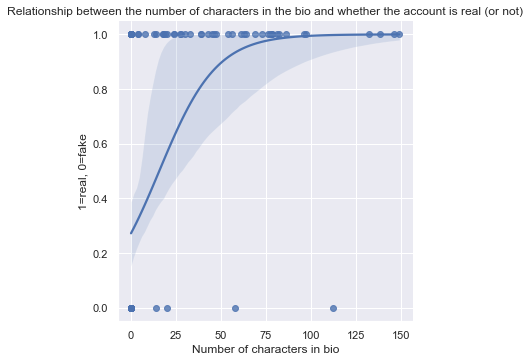

In [18]:
sns.lmplot(x="num_characters_in_bio", y='y',data=instagram, logistic=True)
plt.ylabel('1=real, 0=fake')
plt.xlabel('Number of characters in bio')
plt.title('Relationship between the number of characters in the bio and whether the account is real (or not)')
plt.show()

**b)** Next, fit the logistic regression model for this relationship.  Print the fitted model.  Write the fitted regression line.  

In [19]:
mod1 = smf.logit(formula='y ~ num_characters_in_bio', data=instagram).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.494033
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  112
Model:                          Logit   Df Residuals:                      110
Method:                           MLE   Df Model:                            1
Date:                Fri, 21 Apr 2023   Pseudo R-squ.:                  0.2866
Time:                        11:42:49   Log-Likelihood:                -55.332
converged:                       True   LL-Null:                       -77.561
Covariance Type:            nonrobust   LLR p-value:                 2.598e-11
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.9843      0.259     -3.793      0.000      -1.493      -0.476
num_characters_in_bio     0.0628      0.015      4.152      0.000       0.033       0.092
=========================================================================================
"""

$\hat{y}$ = -0.9843 + 0.0628 * [num_characters_in_bio]

In this case, $\hat{y}$ is $log(\frac{\hat{p}}{1-\hat{p}})$ as $\hat{p}$ is estimated probability that the insta account is real. 

**c)** Interpret the fitted coefficients.  You should give four interpretations:

- for the intercept in terms of odds,
- for the slope in terms of log odds, and
- for the slope in terms of odds.

In [20]:
import numpy as np

odds_intercept = np.exp(-0.9843)
odds_slope = np.exp(0.0628)

print(odds_intercept)
print(odds_slope)

0.3737007259094792
1.064813855162576


**1. for the intercept in terms of log odds**

I estimate the expected log odds of being a real instagram account is -0.9843 for an instagram account that has 0 character in its bio. 

**2. for the slope in tems of log odds**

I estimate the expected log odds of being a real instagram accout is 0.0628 larger when the number of character in its bio gets larger by 1. 

**3. for the intercept in terms of odds**

For an instagram account that has 0 character in its bio, the estimated expected odds of being a real instagram is $e^{-0.9843}$ =0.3737.

**4. for the slope in terms of odds**

We expect the estimated odds to increase by a factor of $e^{0.0628}$ = 1.0648 for each 1 character increase in the number of character in the bio of an instagram account. 

**d)** Using the model from Part **4b**, predict the probability, odds, and log odds that an Instagram account will be real or fake for an account with 100 characters in the bio.  

Be sure to specify which quantity you are predicting & the level you are predicting these values for: whether it's for an account being real or for an account being fake.  

Which of these three predicted values should we compare to the predicted value from Part **3c**?  How does it compare?

In [21]:
#1. the log odds that an Instagram account will be real

log_odds = -0.9843 + 0.0628 * 100
print(log_odds)

#2. the odds that an Instagram account will be real

odds = np.exp(log_odds)
print(odds)

#3. the probability that an Instagram account will be real

p = odds / (1 + odds)
print(p)


5.295699999999999
199.477211153863
0.9950119018802964


I should compare the predicted value from Part 3c to the third predicted value, which is the probability that an instagram account will be real. 

The estimated value of 0.995 seems to be more reasonable than the value from Part 3c, because it is within a range 0f [0,1] and has lower residual for the Instagram accounts that are real.

## 5. Inference for Logistic Regression

We'll continue exploring the model fitted in **4b**, but for this part we will focus on inference.

**a)** What is a 95% range of reasonable values for the population slope from this logistic regression model?

(0.033, 0.092)

(I used the summary output table to find this 95% confidence interval.)

**b)** I want to find out if it is reasonable to predict whether an Instagram account is real or fake based on the number of characters in the bio.  What should my hypotheses be to perform this test?  What is my corresponding *p*-value?  The decision for this test at a 5% level?

**1. Setting up hypothses for my test**

$H_0: \beta=0$

$H_A:$ $\beta\neq 0$ 

($\beta$ is population slope for a variable 'the number of characters in the bio')

**2. Use the summary output table to find the test statistic and $p-value$ for this test**.

The summary ouput table tells us that the test statistic is 4.152 and $p-value$ is 0.000.

In [22]:
# if I calculate p-value by hand...

p_value = 2 * (1-norm.cdf(4.152))
print(p_value)

3.29582261924255e-05


**3. The decision for this test at a 5% level**

Our $p-value$ < $\alpha = 0.05$. 

Therefore, I reject the null hypothesis. (In context, at a 95% confidence level, I have sufficient evidence to suggest that it is reasonable to predict whether an Instagram account is real or fake based on the number of characters in the bio.)

**c)** Based on my confidence interval from Part **5a**, is my null hypothesis from **5b** reasonable?  Based on the confidence interval, what decision would I expect from the hypothesis test?  Does this match with what you decided in **5b**?

No, the null value (0) is not in the confidence interval from Part **5a**  and my null hypothesis would be unreasonable. Therefore, I reject the null hypothesis. (In context, the conclusion is same as the conclusion of Part **5b**.) This matches with what I decided in **5b** . 

**d)** Instead of a confidence interval for the population slope, I want to find the 95% range of reasonable values for the odds multiplier.  Find the corresponding confidence interval.

In [23]:
l_b = np.exp(0.033)
u_b = np.exp(0.092)

print(l_b, u_b)

1.0335505392413056 1.0963648220808169


(1.036, 1.096)